In [1]:
import torch

from nerf_encodings import *
from kilonerf_helpers import *

torch.set_num_interop_threads(32)

dev = "cuda"
dtype = "torch.FloatTensor"

data = np.load('data/tiny_nerf_data.npz')
images = data['images']
poses = data['poses']
focal = data['focal']
H, W = 100,100

i_img = 101 

pose = torch.from_numpy(poses[i_img]).type(dtype).to(dev)
target = torch.from_numpy(images[i_img]).type(dtype).cuda().reshape((-1,3))

vecs = get_vecs(H,W,focal).type(dtype).to(dev)
oris, dirs, view_dirs = get_params(vecs,pose) 
radii = get_radii(vecs)

In [30]:
%%timeit
a,b = sample_rays(oris,dirs,radii, 128, 2, 6, True)
print(a.shape)
torch.cuda.synchronize()

torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])
torch.Size([10000, 129])


In [2]:
%%timeit
sample_rays(oris,dirs,radii, 128, 2, 6, True)

318 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
sample_rays(oris,dirs,radii, 128, 2, 6, False)

(tensor([[2.0000, 2.0312, 2.0625,  ..., 5.9375, 5.9688, 6.0000],
         [2.0000, 2.0312, 2.0625,  ..., 5.9375, 5.9688, 6.0000],
         [2.0000, 2.0312, 2.0625,  ..., 5.9375, 5.9688, 6.0000],
         ...,
         [2.0000, 2.0312, 2.0625,  ..., 5.9375, 5.9688, 6.0000],
         [2.0000, 2.0312, 2.0625,  ..., 5.9375, 5.9688, 6.0000],
         [2.0000, 2.0312, 2.0625,  ..., 5.9375, 5.9688, 6.0000]],
        device='cuda:0', dtype=torch.float16),
 (tensor([[[-1.1006, -0.0439,  1.9766],
           [-1.0869, -0.0156,  1.9609],
           [-1.0742,  0.0127,  1.9463],
           ...,
           [ 0.5938,  3.5117,  0.0508],
           [ 0.6074,  3.5391,  0.0352],
           [ 0.6211,  3.5664,  0.0195]],
  
          [[-1.0908, -0.0566,  1.9766],
           [-1.0771, -0.0283,  1.9609],
           [-1.0635,  0.0000,  1.9463],
           ...,
           [ 0.6211,  3.4766,  0.0508],
           [ 0.6348,  3.5039,  0.0352],
           [ 0.6484,  3.5312,  0.0195]],
  
          [[-1.0811, -0.0664

In [28]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,6)

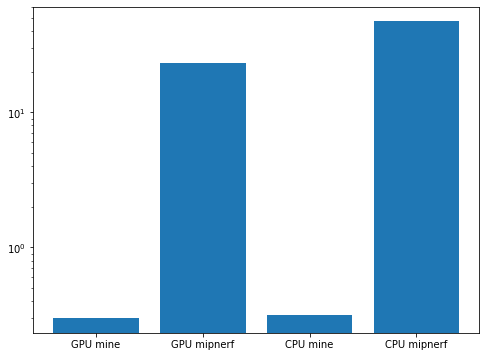

In [29]:
ax = plt.axes()
ax.bar(["GPU mine","GPU mipnerf","CPU mine","CPU mipnerf"],[0.301,23,0.318,47])
ax.set_yscale("log")

In [32]:
23/0.301

72.32704402515724

In [34]:
47/0.318

147.7987421383648